In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import umap
import kmapper as km
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from ripser import ripser
from persim import plot_diagrams

import warnings
warnings.filterwarnings("ignore")

## Carga y visualización de datos

In [39]:
# Importar la base limpia
ventas = pd.read_excel("VM_Limpio.xlsx")

In [40]:
ventas.head()

,Date - Mes,PLACA DE ROLLO,PLACA DE HOJA,LAMINA EN CALIENTE,LAMINA EN FRIO,LAMINA GALVANIZADA,PERFILES ESTRUCTURALES,PERFILES COMERCIALES
0,2018-01-01,11895.362500,3344.600000,10674.189105,994.039,175.860,11091.78550,3079.247
1,2018-02-01,9888.514400,2100.727900,7326.124922,753.252,143.491,9140.27340,2669.081
2,2018-03-01,12495.709202,1427.315000,9297.440790,935.135,163.484,10238.60154,3008.352
3,2018-04-01,10563.975845,2159.007176,7331.194294,835.028,148.461,8067.45400,3560.813
4,2018-05-01,12415.699501,1756.589350,8734.480838,939.027,124.863,12012.63180,3641.072


In [41]:
ventas.sample()

,Date - Mes,PLACA DE ROLLO,PLACA DE HOJA,LAMINA EN CALIENTE,LAMINA EN FRIO,LAMINA GALVANIZADA,PERFILES ESTRUCTURALES,PERFILES COMERCIALES
33,2020-10-01,11050.79453,2557.85556,12930.527029,1812.181,271.928262,12441.648286,5224.627212


In [42]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date - Mes              84 non-null     datetime64[ns]
 1   PLACA DE ROLLO          84 non-null     float64       
 2   PLACA DE HOJA           84 non-null     float64       
 3   LAMINA EN CALIENTE      84 non-null     float64       
 4   LAMINA EN FRIO          84 non-null     float64       
 5   LAMINA GALVANIZADA      84 non-null     float64       
 6   PERFILES ESTRUCTURALES  84 non-null     float64       
 7   PERFILES COMERCIALES    84 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 5.4 KB


In [43]:
ventas.shape

(84, 8)

In [44]:
ventas.columns

Index(['Date - Mes', 'PLACA DE ROLLO', 'PLACA DE HOJA', 'LAMINA EN CALIENTE',
       'LAMINA EN FRIO', 'LAMINA GALVANIZADA', 'PERFILES ESTRUCTURALES',
       'PERFILES COMERCIALES'],
      dtype='object')

In [45]:
ventas.index

RangeIndex(start=0, stop=84, step=1)

In [46]:
ventas.dtypes

Date - Mes                datetime64[ns]
PLACA DE ROLLO                   float64
PLACA DE HOJA                    float64
LAMINA EN CALIENTE               float64
LAMINA EN FRIO                   float64
LAMINA GALVANIZADA               float64
PERFILES ESTRUCTURALES           float64
PERFILES COMERCIALES             float64
dtype: object

In [47]:
ventas.describe()

,Date - Mes,PLACA DE ROLLO,PLACA DE HOJA,LAMINA EN CALIENTE,LAMINA EN FRIO,LAMINA GALVANIZADA,PERFILES ESTRUCTURALES,PERFILES COMERCIALES
count,84,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2021-06-16 07:25:42.857142784,12247.235314,2189.012928,10959.359185,1603.408096,581.371209,9930.702392,4079.685368
min,2018-01-01 00:00:00,6520.761081,885.906000,5171.505232,600.175000,103.341000,5749.595881,2669.081000
25%,2019-09-23 12:00:00,9823.193245,1729.556976,7863.619421,934.466500,182.394260,8815.746112,3418.461206
50%,2021-06-16 00:00:00,11574.177803,2117.374398,10172.342530,1615.564619,531.731928,9917.859658,4095.055683
75%,2023-03-08 18:00:00,14180.522619,2452.326275,13147.617290,2121.004218,948.639368,11009.609224,4621.846900
max,2024-12-01 00:00:00,19872.553662,4663.174572,22955.837501,3309.644228,1575.106329,15987.114025,6196.523457
std,NaN,3162.814388,673.053023,3824.865306,705.336337,419.442213,1579.331810,816.082656


In [48]:
ventas.isnull().sum()

Date - Mes                0
PLACA DE ROLLO            0
PLACA DE HOJA             0
LAMINA EN CALIENTE        0
LAMINA EN FRIO            0
LAMINA GALVANIZADA        0
PERFILES ESTRUCTURALES    0
PERFILES COMERCIALES      0
dtype: int64

In [49]:
ventas.nunique()

Date - Mes                84
PLACA DE ROLLO            84
PLACA DE HOJA             84
LAMINA EN CALIENTE        84
LAMINA EN FRIO            84
LAMINA GALVANIZADA        84
PERFILES ESTRUCTURALES    84
PERFILES COMERCIALES      84
dtype: int64

In [50]:
ventas.duplicated().sum() 

0

## Ventas Mensuales

In [51]:
ventas_long = ventas.melt(id_vars=["Date - Mes"], var_name="Producto", value_name="Ventas")
ventas_long["Fecha"] = pd.to_datetime(ventas_long["Date - Mes"]) #Convertir decha a datetime
ventas_long["Año"] = ventas_long["Fecha"].dt.year
ventas_long["Mes"] = ventas_long["Fecha"].dt.month_name(locale='es_ES')

orden_meses = [
    "enero", "febrero", "marzo", "abril", "mayo", "junio",
    "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"
]
ventas_long["Mes"] = ventas_long["Mes"].str.lower()
ventas_long["Mes"] = pd.Categorical(ventas_long["Mes"], categories=orden_meses, ordered=True)

# Medidas estadisticas
ventas_long.groupby("Producto")["Ventas"].describe()

,count,mean,std,min,25%,50%,75%,max
Producto,,,,,,,,
LAMINA EN CALIENTE,84.0,10959.359185,3824.865306,5171.505232,7863.619421,10172.342530,13147.617290,22955.837501
LAMINA EN FRIO,84.0,1603.408096,705.336337,600.175000,934.466500,1615.564619,2121.004218,3309.644228
LAMINA GALVANIZADA,84.0,581.371209,419.442213,103.341000,182.394260,531.731928,948.639368,1575.106329
PERFILES COMERCIALES,84.0,4079.685368,816.082656,2669.081000,3418.461206,4095.055683,4621.846900,6196.523457
PERFILES ESTRUCTURALES,84.0,9930.702392,1579.331810,5749.595881,8815.746112,9917.859658,11009.609224,15987.114025
PLACA DE HOJA,84.0,2189.012928,673.053023,885.906000,1729.556976,2117.374398,2452.326275,4663.174572
PLACA DE ROLLO,84.0,12247.235314,3162.814388,6520.761081,9823.193245,11574.177803,14180.522619,19872.553662


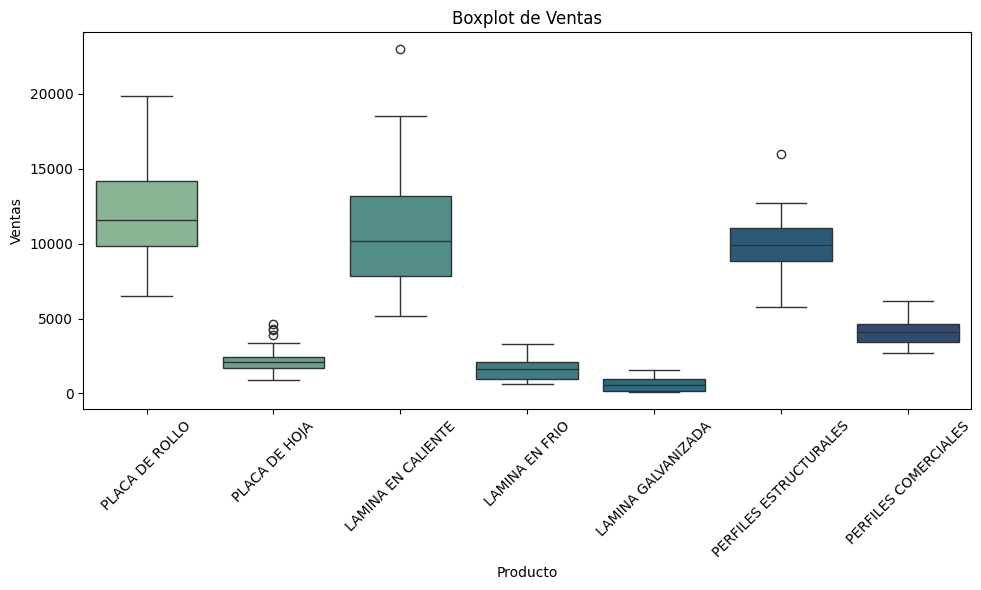

In [52]:
# Boxplot de las ventas por productos
plt.figure(figsize=(10, 6))
sns.boxplot(data=ventas_long, x="Producto", y="Ventas", palette="crest")
plt.title("Boxplot de Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

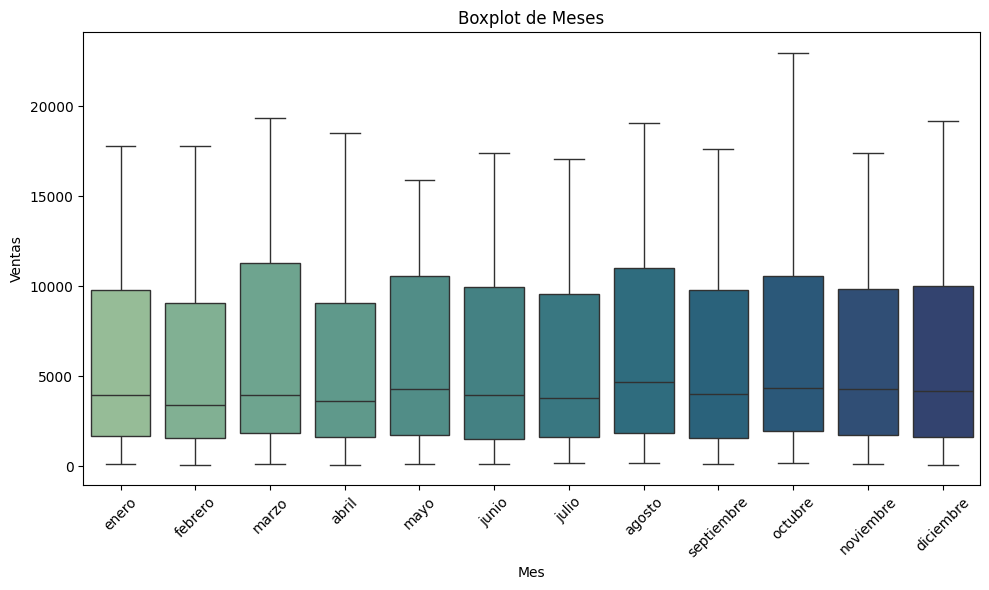

In [53]:
# Boxplot de las ventas por mes
plt.figure(figsize=(10, 6))
sns.boxplot(data=ventas_long, x="Mes", y="Ventas", palette="crest")
plt.title("Boxplot de Meses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

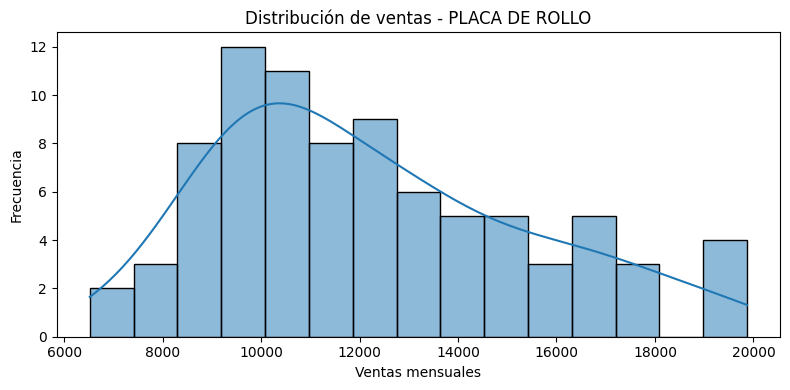

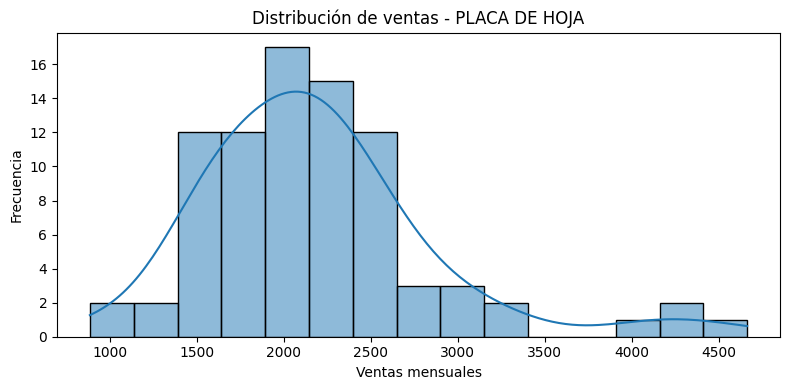

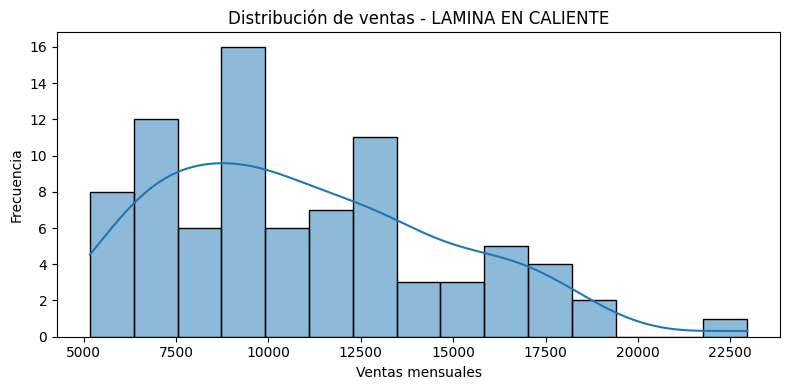

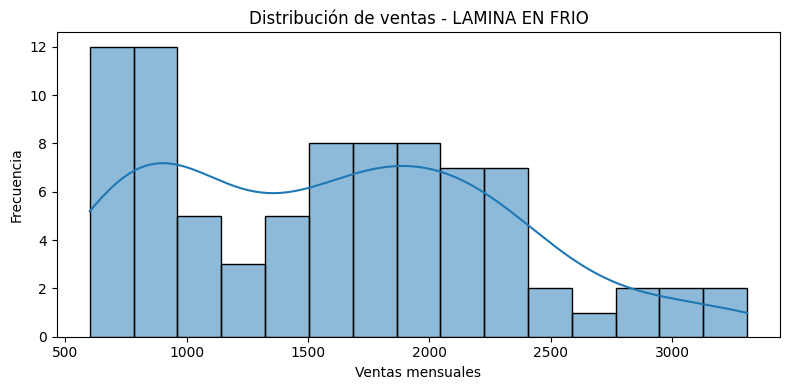

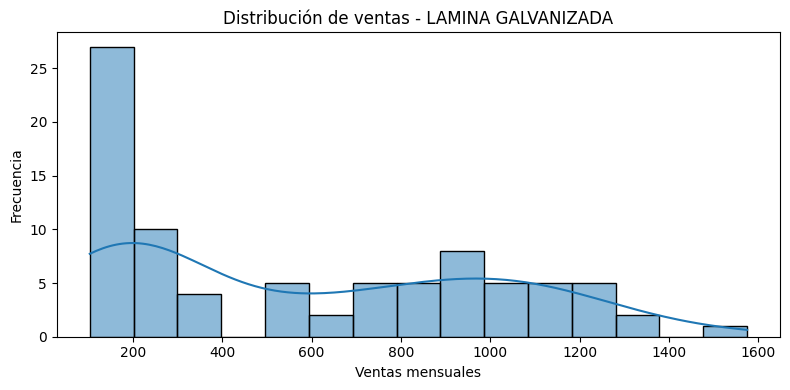

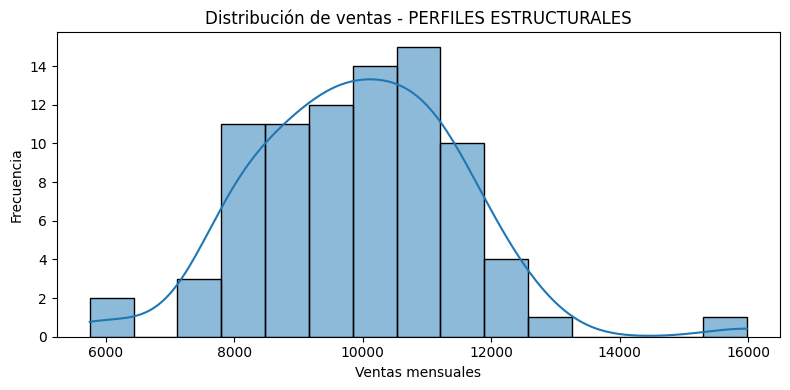

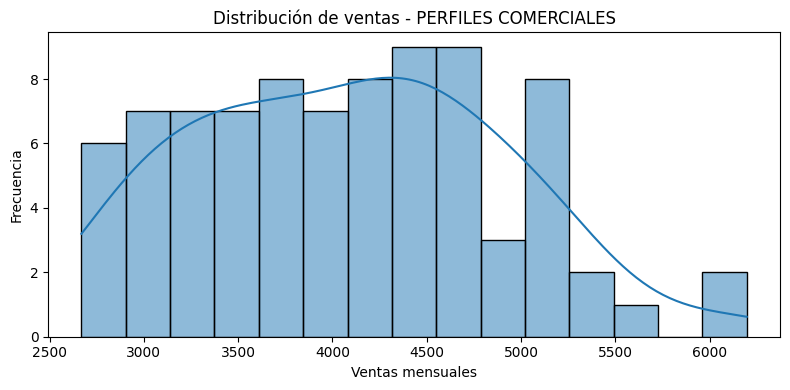

In [54]:
# Histogramas de productos
productos = ventas_long["Producto"].unique()

for producto in productos:
    plt.figure(figsize=(8, 4))
    subset = ventas_long[ventas_long["Producto"] == producto]
    sns.histplot(subset["Ventas"], kde=True, bins=15)
    plt.title(f"Distribución de ventas - {producto}")
    plt.xlabel("Ventas mensuales")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

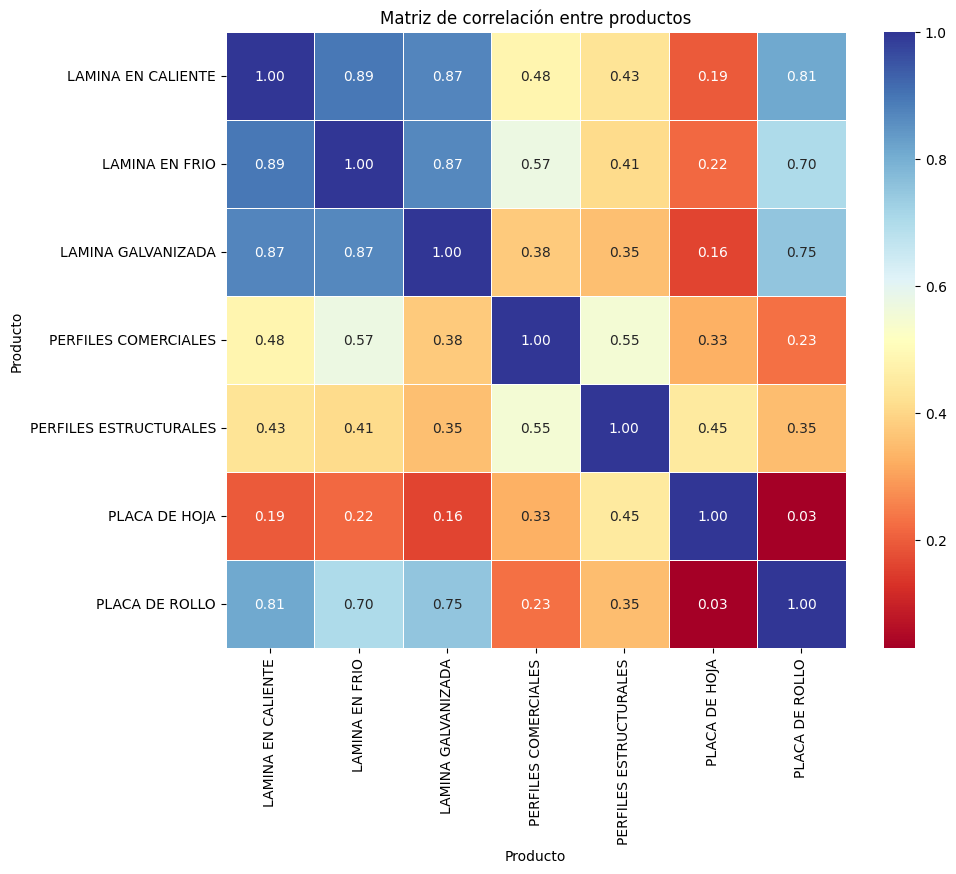

In [55]:
# Heatmap de la correlacion
ventasHM = ventas_long.pivot(index="Fecha", columns="Producto", values="Ventas")

plt.figure(figsize=(10, 8))
sns.heatmap(ventasHM.corr(), annot=True, fmt=".2f", cmap="RdYlBu", linewidths=0.5)
plt.title("Matriz de correlación entre productos")
plt.show()

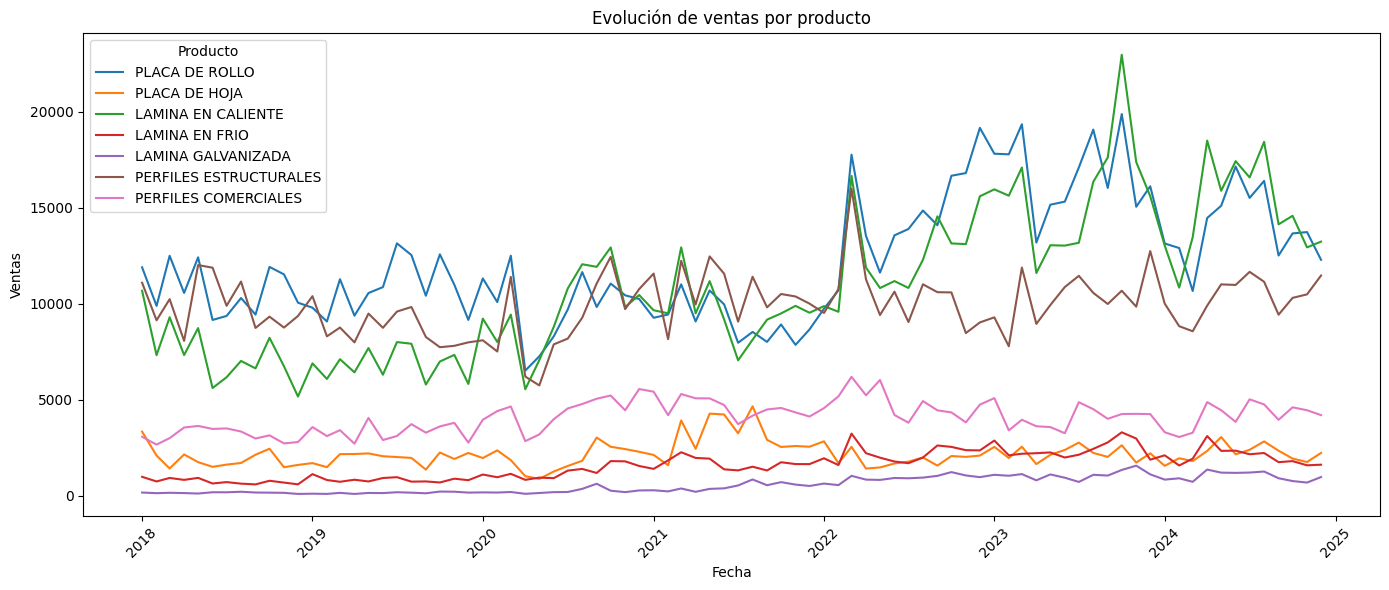

In [56]:
# Evolucion de ventas por producto
plt.figure(figsize=(14, 6))
sns.lineplot(data=ventas_long, x="Fecha", y="Ventas", hue="Producto")
plt.title("Evolución de ventas por producto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Análisis Topológico

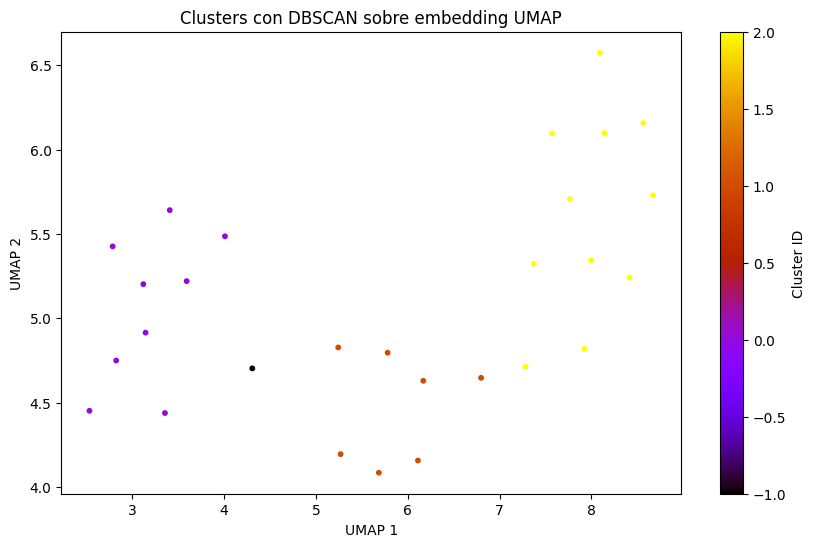

In [57]:
# UMAP y DBSCAN
datos_combinados = pd.read_csv("datos_combinados.csv")

df = datos_combinados.dropna()
X = df.select_dtypes(include=np.number)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir dimensión con UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
embedding = reducer.fit_transform(X_scaled)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(embedding)

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='gnuplot', s=10)
plt.title('Clusters con DBSCAN sobre embedding UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster ID')
plt.show()

En el gráfico podemos observar lo siguiente:
1. Tres grupos bien definidos:
- Los colores indican 3 regiones con densidades internas suficientes para formar clústers.
- Esto sugiere que hay comportamientos distintos en ciertos trimestres respecto a la combinación de ventas y condiciones macroeconómicas.

2. Un punto como ruido (negro):
- DBSCAN considera este trimestre como atípico o sin grupo similar cercano.
- Podría ser por una crisis económica, un evento de mercado puntual, o una combinación anómala en tus datos (como un pico de ventas o caída del PIB).

3. Distribución no lineal:
- La disposición en el plano UMAP no es lineal, por lo que el uso de métodos topológicos tiene sentido. Hay una estructura curva o ramificada entre los puntos.

In [58]:
df["cluster"] = labels 
numeric_cols = df.select_dtypes(include='number').columns
resumen_clusters = df.groupby("cluster")[numeric_cols].mean()
print(resumen_clusters)

         PLACA DE ROLLO  PLACA DE HOJA  LAMINA EN CALIENTE  LAMINA EN FRIO  \
cluster                                                                      
-1         33907.584792    6205.559750        26673.274757     3236.016000   
 0         31208.188960    5573.704693        21420.985005     2442.084398   
 1         30078.737665    8284.114658        31334.846045     5137.869223   
 2         45766.847023    6319.943758        43798.191766     6682.401807   

         LAMINA GALVANIZADA  PERFILES ESTRUCTURALES  PERFILES COMERCIALES  \
cluster                                                                     
-1               564.430427            27010.059074          13030.032604   
 0               481.155824            27160.903690           9797.377283   
 1              1412.432822            32122.577488          14408.486397   
 2              3095.756270            30714.796933          12784.339813   

                  PIB  cluster  
cluster                         
-1

1. Clúster 0
- Ventas moderadas en la mayoría de los productos.
- Especialmente bajas en “Lámina en caliente” y “Perfiles comerciales”.
- PIB más bajo de los grupos.
- Posiblemente representa periodos normales, estables o de recuperación económica lenta. No hay actividad económica destacada.


2. Clúster 1
- Elevadas ventas de “Lámina galvanizada” y “Perfiles estructurales”.
- Alto nivel en “Perfiles comerciales” también.
- PIB alto.
- Este grupo puede reflejar trimestres con alta actividad en sectores industriales o construcción. Representa un ciclo de crecimiento sostenido.


2. Clúster 2
- Las ventas más altas de todos los clústers en casi todos los productos.
- PIB más alto observado.
- Trimestres con máximos históricos. Podrían estar asociados a políticas públicas de inversión, auge de exportaciones o demanda extraordinaria.


3. Clúster -1 (Inicio del COVID-19)
- Clasificado por DBSCAN como ruido, pero con ventas elevadas en ciertos productos.
- PIB también elevado.
- Este trimestre puede corresponder a un evento atípico o extraordinario.


In [59]:
trimestres_por_cluster = df[["Trimestre", "cluster"]].sort_values(by="cluster")
print(trimestres_por_cluster)

   Trimestre  cluster
8     2020Q1       -1
0     2018Q1        0
1     2018Q2        0
2     2018Q3        0
3     2018Q4        0
4     2019Q1        0
5     2019Q2        0
6     2019Q3        0
7     2019Q4        0
9     2020Q2        0
16    2022Q1        1
15    2021Q4        1
14    2021Q3        1
13    2021Q2        1
12    2021Q1        1
11    2020Q4        1
10    2020Q3        1
17    2022Q2        2
18    2022Q3        2
19    2022Q4        2
20    2023Q1        2
21    2023Q2        2
22    2023Q3        2
23    2023Q4        2
24    2024Q1        2
25    2024Q2        2
26    2024Q3        2
27    2024Q4        2


**Las ventas de acero y los factores económicos fluctuan en bloques temporales**

In [63]:
# Mapper

# --- Selección de características numéricas ---
features = [
    'PLACA DE ROLLO',
    'PLACA DE HOJA',
    'LAMINA EN CALIENTE',
    'LAMINA EN FRIO',
    'LAMINA GALVANIZADA',
    'PERFILES ESTRUCTURALES',
    'PERFILES COMERCIALES',
    'PIB'
]
df_mapper = df[features].copy()

# --- Escalamiento de variables ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_mapper)

# --- Inicializar KeplerMapper ---
mapper = km.KeplerMapper(verbose=1)

# --- Aplicar UMAP para reducción de dimensionalidad (lens) ---
lens = umap.UMAP(n_components=2, random_state=42).fit_transform(X_scaled)

# --- Crear el grafo topológico ---
graph = mapper.map(
    lens,
    X_scaled,
    clusterer=DBSCAN(eps=5, min_samples=3),
    cover=km.Cover(n_cubes=10, perc_overlap=0.7)
)

# --- Generar la visualización interactiva ---
mapper.visualize(
    graph,
    path_html="mapper_produccion_pib.html",
    title="Mapa topológico de producción y PIB"
)


KeplerMapper(verbose=1)
Mapping on data shaped (28, 8) using lens shaped (28, 2)

Creating 100 hypercubes.

Created 324 edges and 44 nodes in 0:00:00.399422.
Wrote visualization to: mapper_produccion_pib.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapa topológico de producción y PIB | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-siz

El mapa topológico generado con Mapper y UMAP revela una estructura continua y curvada que representa la evolución conjunta de las ventas de acero y el PIB. La ausencia de ciclos cerrados sugiere una transición estructural en el comportamiento del mercado, más que repeticiones estacionales.

Esta forma permite visualizar cómo cambian gradualmente las condiciones económicas y cómo ciertos patrones de venta están conectados con distintos niveles de PIB. Este análisis topológico aporta una visión más profunda que las estadísticas convencionales, alineándose perfectamente con nuestro objetivo de entender el impacto macroeconómico sobre el mercado del acero.

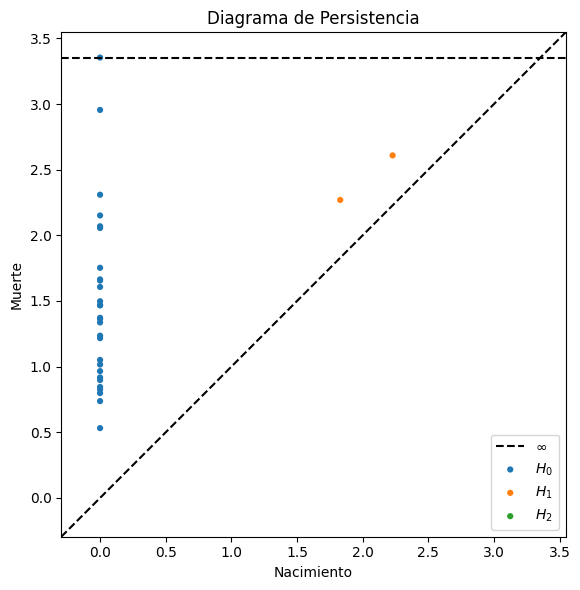

In [77]:
# Escalar los datos
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular homología persistente
diagrams = ripser(X_scaled, maxdim=2)['dgms']

# Graficar diagrama con línea diagonal roja
plt.figure(figsize=(10, 6))
plot_diagrams(diagrams, lifetime=False, show=False)

# Añadir línea roja (diagonal)
max_val = np.max([d[:, 1].max() if len(d) > 0 else 0 for d in diagrams])

plt.title("Diagrama de Persistencia")
plt.xlabel("Nacimiento")
plt.ylabel("Muerte")
plt.legend()
plt.tight_layout()
plt.show()

Este análisis muestra la estructura topológica profunda de los datos de ventas y PIB, revelando patrones que ayudan a entender el comportamiento del mercado del acero.

1. H0 – Componentes Conectados
- La mayoría de los puntos H0 están muy cerca de la diagonal roja, lo que significa que los grupos de trimestres similares se conectan rápidamente entre sí.
- No hay grandes cortes o separaciones bruscas entre diferentes periodos del mercado. El comportamiento de ventas y PIB forma un continuo, sin “saltos abruptos”.

2. H1 – Ciclos Topológicos
- Aparecen dos puntos H1 bien alejados de la diagonal, lo que indica la existencia de ciclos persistentes.
- Existen patrones repetitivos en el comportamiento conjunto de ventas y condiciones macroeconómicas. Estos ciclos podrían estar relacionados con:
- Fases del ciclo económico (recuperación, expansión, estabilidad).
- Estacionalidad oculta o comportamiento estratégico del mercado.


Este diagrama demuestra que el mercado del acero tiene estructura y patrones repetitivos reales, no es completamente aleatorio.
Detectar estos ciclos puede permitir a la empresa anticipar cambios en la demanda. Reconocer cuándo se entra en un patrón conocido ayuda a tomar decisiones más informadas en producción, inventario y estrategia comercial.
